# Binary Feature Extraction

This Jupyter Notebook contains the experiments pertaining to the Binary Feature Extraction aspect of this project.

## Instruction Frequency

Here we extract the frequency of commonly used instructions.

In [21]:
import lief
import numpy as np
from capstone import *

def getTextfromBinary(path):
    binary = lief.parse(path)

    text_section = binary.get_section(".text")

    return bytes(text_section.content)

def getInstructionCounts(code: bytes):
 
    md = Cs(CS_ARCH_X86, CS_MODE_64)
    instruction_counts = {}

    for i in md.disasm(code, 0x1000):
        mnemonic = i.mnemonic
        if mnemonic in instruction_counts:
            instruction_counts[mnemonic] += 1
        else:
            instruction_counts[mnemonic] = 1

    return instruction_counts


def getInstructionFrequencies(path):

    text_bytes = getTextfromBinary(path)
    counts = getInstructionCounts(text_bytes)

    relevant_instructions = ["jmp", "call", "ret", "cmp", "mov", "push", "pop", "add", "sub"]
    freqs = np.zeros(len(relevant_instructions), dtype=float)
    total_instructions = 0

    for count in counts.values():
        total_instructions += count

    for i in range(0, len(relevant_instructions)):
        current_instr = relevant_instructions[i]
        if current_instr in counts:
            c = counts.get(current_instr)
            freqs[i] = c / total_instructions
        else:
            freqs[i] = 0

    return freqs

Testing this code enables us to return the instruction frequencies. We can plot the frequencies in 3 example binaries to visually see the average frequencies of each instruction.

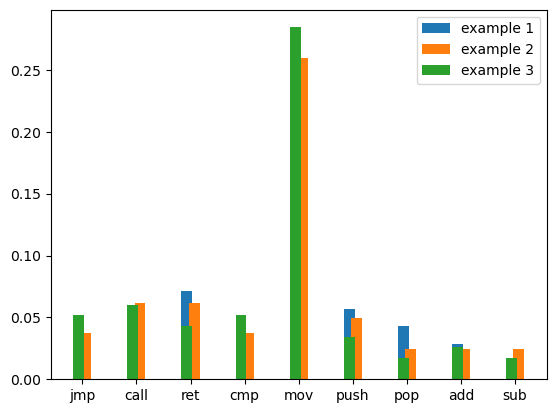

In [27]:
import matplotlib.pyplot as plt

ex1 = getInstructionFrequencies("../product/binary-feature-extraction/examples/example1")
ex2 = getInstructionFrequencies("../product/binary-feature-extraction/examples/example2")
ex3 = getInstructionFrequencies("../product/binary-feature-extraction/examples/example3")

relevant_instructions = ["jmp", "call", "ret", "cmp", "mov", "push", "pop", "add", "sub"]
w, x = 0.2, np.arange(len(relevant_instructions))
plt.bar(x - w/3, ex1, w, label='example 1')
plt.bar(x + w/3, ex2, w, label='example 2')
plt.bar(x - w/3, ex3, w, label='example 3')
plt.xticks(x, relevant_instructions)
plt.legend()

plt.show()